# Introducción a Matplotlib

## Analítica y Ciencia de Datos

### CIDE - Otoño 2015

# ¿Qué es Matplotlib?

* Las tres librerías de Python más utilizadas en computación científica son:

    1. NumPy: cálculos numéricos en general, funciones universales optimizadas y uso del *data array*.
    2. Matplotlib: gráficos en 2D
    3. Pandas: manejo de datos tabulares.
    
* Matplotlib nos permite hacer gráficos customizables de manera rápida y flexible

# Importando Matplotlib

* `Matplotlib` tiene varias librerías, pero la que se utiliza para graficar es `Pyplot`.


* Así que generalmente se invoca de la siguiente manera:

    > `import matplotlib.pyplot as plt`
    
* Hay dos formas para ver las gráficas:

    * `inline`: las gráficas aparecen en el notebook.
    * Afuera del notebook
    

* En este curso vamos a utilizar el método `inline` que se invoca al importar `PyPlot` con el magic `%matplotlib inline`:
    
    > `import matplotlib.pyplot as plt`
    
    > `%matplotlib inline`
    

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Qué gráficos podemos hacer en Matplotlib


* Casi todo lo que quieren hacer se puede hacer en Matplotlib.

* Todas las funciones para graficar se encuentran en la [ayuda](http://matplotlib.org/api/pyplot_summary.html)

* Adicionalmente, cuentan con una [galería](http://matplotlib.org/gallery.html) bastante amplia, con ejemplos y códigos.

* A continuación vamos a simular unos datos y vamos a trabajar con estos en ejemplos que vayan aumentando en complejidad.

* Vamos a simular el siguiente modelo:

$$
\begin{eqnarray*}
x_{i1} &\sim& N(0,2) \text{ iid} \\
x_{i2},x_{i3} &\sim& MVN(\mathbf{\mu},\mathbf{\Sigma}) \\
D_{gender,i} &\sim& Bin(1,0.7)\\
\epsilon_i &\sim& N(0,1)\\
y_i &=& 0.4 + 2x_{i1} -3 x_{i2} + 7x_{i3} + 0.5D_{gender,i} + \epsilon_i
\end{eqnarray*}
$$

In [125]:
# simulemos varios regresores
# Tamaño de la muestra:
N = 100
# Normal, media cero, varianza 2
x1 = np.sqrt(2)*np.random.randn(N,1)
# Simulemos una variable dicótoma: binomial(ntrials,prob,size)
gender = np.random.binomial(1,0.5,N).reshape((N,1))
# Simulemos dos normales multivariadas con correlación positiva:
# Necesitamos dos parámetros: 
# mu: vector de medias,
mu    = np.array([-2,3])
# Sigma: matriz de varianza y covarianza que debe ser Simétrica y Definida Positiva (SPD)
# Así que utilicemos propiedades de las matrices SPD
QMat = np.random.randn(5,2)
EMat = np.diag(np.random.randint(1,10,5))
Sigma = np.dot(QMat.T, np.dot(EMat,QMat))
zvec = np.random.multivariate_normal(mu,Sigma,N)
# Listos simular un Modelo lineal de regresión
beta = np.array([0.4,2,-3,7,0.5]).reshape((5,1))
xmat = np.concatenate((np.ones((N,1)),x1,zvec,gender),axis=1)
y    = np.dot(xmat,beta) + np.random.randn(N,1)
print y.shape

(100, 1)


# Primer tipo de gráfico: scatter

* Veamos los argumentos utiliza la función [`plt.scatter()`](http://matplotlib.org/api/pyplot_api.html)

![caption](figures/scatter_help.png)

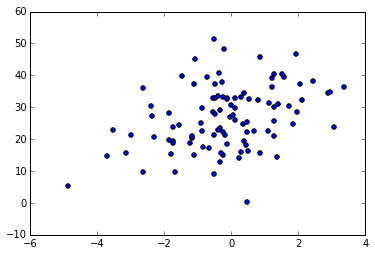

In [126]:
# primer ejemplo: sólo los puntos
plt.scatter(x1,y)

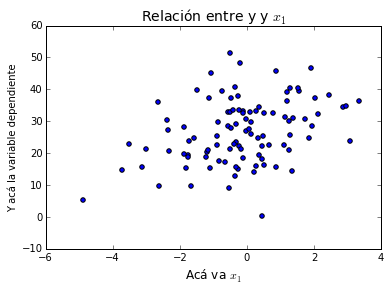

In [127]:
# agreguemos títulos:
# NOTA: para que las tildes/acentos estén incluídas tenemos que decirle a Python que codifique como unicodes:
# en lugar de escribir un string como `dias_sin_acento` lo hacemos como u`días_con_acento`
plt.scatter(x1,y)
plt.xlabel(u'Acá va $x_1$',fontsize=12)
plt.ylabel(u'Y acá la variable dependiente')
plt.title(u'Relación entre y y $x_1$', fontsize=14)


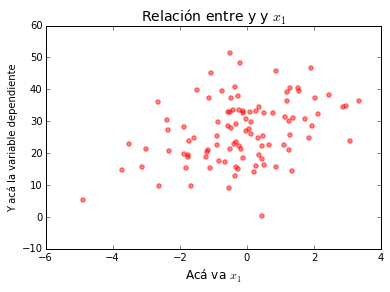

In [128]:
# Cambiemos el color, e introduzcamos el parámetro de transparencia u opacidad: alpha
# La transparencia nos permite visualizar mejor objetos que se traslapan
plt.scatter(x1,y, color='red',alpha=0.5)
plt.xlabel(u'Acá va $x_1$',fontsize=12)
plt.ylabel(u'Y acá la variable dependiente')
plt.title(u'Relación entre y y $x_1$', fontsize=14)


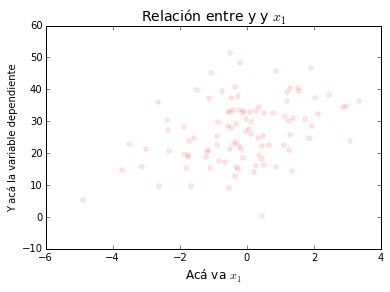

In [129]:
# Transparencia va entre 0 y 1: 0--> transparente
plt.scatter(x1,y, color='red',alpha=0.1)
plt.xlabel(u'Acá va $x_1$',fontsize=12)
plt.ylabel(u'Y acá la variable dependiente')
plt.title(u'Relación entre y y $x_1$', fontsize=14)


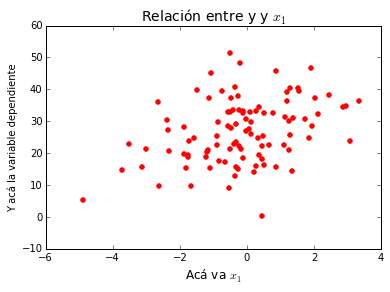

In [130]:
# cercano a uno llegamos al color original
plt.scatter(x1,y, color='red',alpha=0.99)
plt.xlabel(u'Acá va $x_1$',fontsize=12)
plt.ylabel(u'Y acá la variable dependiente')
plt.title(u'Relación entre y y $x_1$', fontsize=14)



In [131]:
# Supongamos que queremos dos colores, azul para hombres y rosado para mujeres:
# Tenemos que hacer dos gráficos, uno seleccionando a los hombres y el otro a las mujeres
# La selección se hace con booleanos
hombre_ind = (gender==0)
# Hagamos un print para ver qué pasa.  Lo importante es que la dimensión es la misma que la original
print hombre_ind[:5], hombre_ind.shape

[[False]
 [False]
 [ True]
 [False]
 [ True]] (100, 1)


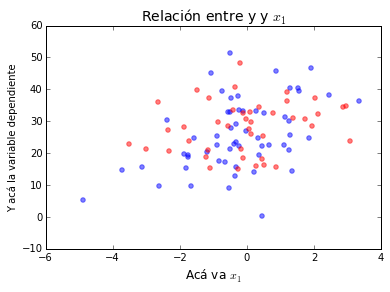

In [132]:
# Empezemos con las hombres
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
# Sigamos con las mujeres
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)
plt.xlabel(u'Acá va $x_1$',fontsize=12)
plt.ylabel(u'Y acá la variable dependiente')
plt.title(u'Relación entre y y $x_1$', fontsize=14)

In [ ]:
# Es útil poner una leyenda o etiquetas
# PRIMERO: veamos cómo es una leyenda:
# Noten los labels que tiene cada scatterplot
# Empezemos con las hombres
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5,label='H')
# Sigamos con las mujeres
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5,label='M')
plt.xlabel(u'Acá va $x_1$',fontsize=12)
plt.ylabel(u'Y acá la variable dependiente')
plt.title(u'Relación entre y y $x_1$', fontsize=14)
plt.legend()

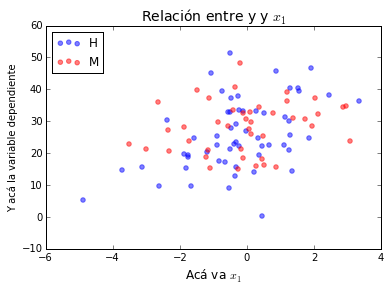

In [139]:
# Es útil poner una leyenda o etiquetas
# PRIMERO: veamos cómo es una leyenda:
# Otra ubicación? Busquen en Google: matplotlib legend location
# Noten los labels que tiene cada scatterplot
# Empezemos con las hombres
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5,label='H')
# Sigamos con las mujeres
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5,label='M')
plt.xlabel(u'Acá va $x_1$',fontsize=12)
plt.ylabel(u'Y acá la variable dependiente')
plt.title(u'Relación entre y y $x_1$', fontsize=14)
plt.legend(loc='upper left')

In [ ]:
# Ahora intentemos con etiquetas:
# voy a tratar de etiquetar, a ojo, un punto rojo y otro azul que tengan espacio para un texto
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
# Sigamos con las mujeres
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)
# Acá vienen los textos:
# La sintaxis es simple: plt.text(xcoord,ycoord,string,...)
plt.text(-3,38,'Mujer',color='r', alpha=0.9,fontsize=10)
plt.text(0.6,0,'Hombre', color='b', alpha=0.9,fontsize=10)

plt.xlabel(u'Acá va $x_1$',fontsize=12)
plt.ylabel(u'Y acá la variable dependiente')
plt.title(u'Relación entre y y $x_1$', fontsize=14)

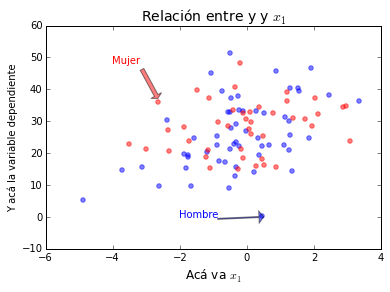

In [177]:
# Ahora intentemos con una anotación con flechas:
# voy a tratar de etiquetar, a ojo, un punto rojo y otro azul que tengan espacio para un texto
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
# Sigamos con las mujeres
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)
# Acá vienen las anotaciones:
# Busquen en Google: matplotlib arrow annotate
# Si quieren customizar las flechas busquen en google: matplotlib arrowprops
plt.annotate('Mujer', xy=(-2.6,36), xytext=(-4, 48),color='r',
            arrowprops=dict(facecolor='red', alpha=0.5,edgecolor='k',shrink=0.1),
            )
plt.annotate('Hombre', xy=(0.5,0), xytext=(-2, 0),color='b',
            arrowprops=dict(facecolor='blue', alpha=0.5,edgecolor='k',width=1),
            )

plt.xlabel(u'Acá va $x_1$',fontsize=12)
plt.ylabel(u'Y acá la variable dependiente')
plt.title(u'Relación entre y y $x_1$', fontsize=14)

### Volvamos al scatterplot original

* Podemos incluir una linea de tendencia para hombres?

* Para mujeres?

* Respuesta: podemos hacer lo que queramos.

* Pero tenemos que estimar la línea de tendencia: hay otras librerías que ya tienen esta funcionalidad

* Vean por ejemplo: [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/)

    * Yo la utilizo para hacer [violin plots](http://stanford.edu/~mwaskom/software/seaborn/examples/grouped_violinplots.html)
    * O [heatmaps](http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html)

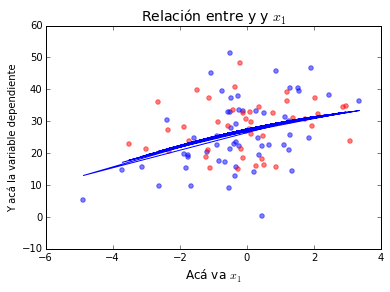

In [181]:
# LINEA DE TENDENCIA
# scatter hombres
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
# Sigamos con las mujeres
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)
# AHORA TENEMOS QUE INCLUIR LAS LINEAS DE TENDENCIA:
# NECESITAMOS ESTIMAR OLS cuadrático, por ejemplo:
# En unas semanas tendremos nuestra función, por ahora hagámoslo a mano
# La matrix X incluye: constante|x1, x1^2
xmat_gph = np.concatenate((np.ones((N,1)),x1,x1**2),axis=1)
# vamos a usar np.linalg.inv() para obtener la inversa
xtx = np.dot(xmat_gph.T,xmat_gph)
inv_xx = np.linalg.inv(xtx)
xty = np.dot(xmat_gph.T,y)
betahat = np.dot(inv_xx,xty)
# listos para estimar yhat = x*betahat
yhat = np.dot(xmat_gph, betahat.reshape((3,1)))
# graphiquémoslo: con plt.plot(x,y)
plt.plot(x1,yhat)
plt.xlabel(u'Acá va $x_1$',fontsize=12)
plt.ylabel(u'Y acá la variable dependiente')
plt.title(u'Relación entre y y $x_1$', fontsize=14)

# Problema:

* Para obtener la línea de tendencia es necesario, primero, ordenar de menor a mayor x1

* Hay una forma muy fácil de hacer con Pandas.

* Mientras tanto busquemos una solución intermedia.

    * No necesitamos $x_1$... sólo una interpolación lineal del mismo

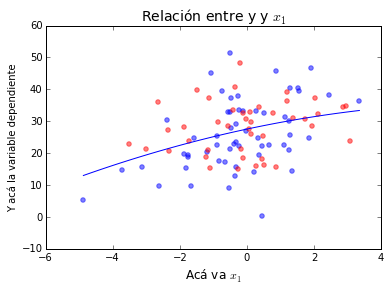

In [185]:
# voy a tratar de etiquetar, a ojo, un punto rojo y otro azul que tengan espacio para un texto
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
# Sigamos con las mujeres
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)
# AHORA TENEMOS QUE INCLUIR LAS LINEAS DE TENDENCIA:
# NECESITAMOS ESTIMAR OLS cuadrático, por ejemplo:
# En unas semanas tendremos nuestra función, por ahora hagámoslo a mano
# La matrix X incluye: constante|x1, x1^2
xmat_gph = np.concatenate((np.ones((N,1)),x1,x1**2),axis=1)
# vamos a usar np.linalg.inv() para obtener la inversa
xtx = np.dot(xmat_gph.T,xmat_gph)
inv_xx = np.linalg.inv(xtx)
xty = np.dot(xmat_gph.T,y)
betahat = np.dot(inv_xx,xty)
#---------------------------------
# YA TENEMOS betahat
# Ahora busquemos una interpolación lineal de x1 con linspace
xlin = np.linspace(np.min(x1), np.max(x1), 100).reshape((100,1))
# Creemos nuestro xmat_lin correspondiente:
xmatlin = np.concatenate((np.ones((100,1)),xlin, xlin**2),axis=1)
# listos
ylin = np.dot(xmatlin,betahat.reshape((3,1)))
# Listos para graficar!
plt.plot(xlin, ylin)
plt.xlabel(u'Acá va $x_1$',fontsize=12)
plt.ylabel(u'Y acá la variable dependiente')
plt.title(u'Relación entre y y $x_1$', fontsize=14)

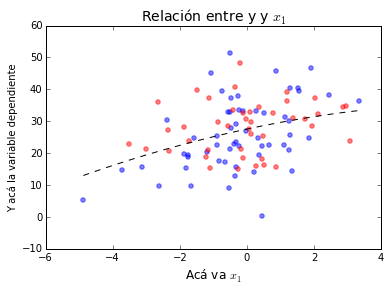

In [192]:
# Esto estuvo bien!
# Cambiemos el color, y el estilo!

# voy a tratar de etiquetar, a ojo, un punto rojo y otro azul que tengan espacio para un texto
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
# Sigamos con las mujeres
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)
# AHORA TENEMOS QUE INCLUIR LAS LINEAS DE TENDENCIA:
# NECESITAMOS ESTIMAR OLS cuadrático, por ejemplo:
# En unas semanas tendremos nuestra función, por ahora hagámoslo a mano
# La matrix X incluye: constante|x1, x1^2
xmat_gph = np.concatenate((np.ones((N,1)),x1,x1**2),axis=1)
# vamos a usar np.linalg.inv() para obtener la inversa
xtx = np.dot(xmat_gph.T,xmat_gph)
inv_xx = np.linalg.inv(xtx)
xty = np.dot(xmat_gph.T,y)
betahat = np.dot(inv_xx,xty)
#---------------------------------
# YA TENEMOS betahat
# Ahora busquemos una interpolación lineal de x1 con linspace
xlin = np.linspace(np.min(x1), np.max(x1), 100).reshape((100,1))
# Creemos nuestro xmat_lin correspondiente:
xmatlin = np.concatenate((np.ones((100,1)),xlin, xlin**2),axis=1)
# La queremos negra y punteada (linestyle, o ls)
ylin = np.dot(xmatlin,betahat.reshape((3,1)))
# Listos para graficar!
plt.plot(xlin, ylin,color='k', ls='--')
plt.xlabel(u'Acá va $x_1$',fontsize=12)
plt.ylabel(u'Y acá la variable dependiente')
plt.title(u'Relación entre y y $x_1$', fontsize=14)

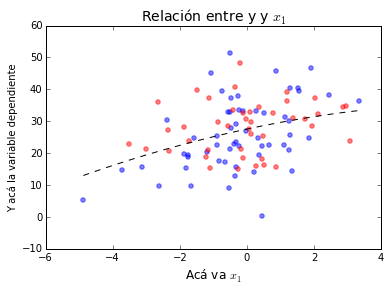

In [191]:
# ME GUSTA: LISTOS PARA GUARDARLA
# VEAN LOS CAMBIOS AL FINAL
#----------------------------
# voy a tratar de etiquetar, a ojo, un punto rojo y otro azul que tengan espacio para un texto
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
# Sigamos con las mujeres
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)
# AHORA TENEMOS QUE INCLUIR LAS LINEAS DE TENDENCIA:
# NECESITAMOS ESTIMAR OLS cuadrático, por ejemplo:
# En unas semanas tendremos nuestra función, por ahora hagámoslo a mano
# La matrix X incluye: constante|x1, x1^2
xmat_gph = np.concatenate((np.ones((N,1)),x1,x1**2),axis=1)
# vamos a usar np.linalg.inv() para obtener la inversa
xtx = np.dot(xmat_gph.T,xmat_gph)
inv_xx = np.linalg.inv(xtx)
xty = np.dot(xmat_gph.T,y)
betahat = np.dot(inv_xx,xty)
#---------------------------------
# YA TENEMOS betahat
# Ahora busquemos una interpolación lineal de x1 con linspace
xlin = np.linspace(np.min(x1), np.max(x1), 100).reshape((100,1))
# Creemos nuestro xmat_lin correspondiente:
xmatlin = np.concatenate((np.ones((100,1)),xlin, xlin**2),axis=1)
# La queremos negra y punteada (linestyle, o ls)
ylin = np.dot(xmatlin,betahat.reshape((3,1)))
# Listos para graficar!
plt.plot(xlin, ylin,color='k', ls='--')
plt.xlabel(u'Acá va $x_1$',fontsize=12)
plt.ylabel(u'Y acá la variable dependiente')
plt.title(u'Relación entre y y $x_1$', fontsize=14)
# LISTOS PARA GUARDARLA
# TENEMOS VARIAS ALTERNATIVAS: busquen en google SAVEFIG matplotlib backends
# yo la quiero guardar como pdf (es fácil de importar en Latex)
# o como PNG
plt.savefig('miprimerafigura.pdf')
plt.savefig('miprimerafigura.png')

# Algunos elementos u objetos de un gráfico que hemos mencionado y manipulado hasta ahora

* En este gráfico de `scatter` simple hemos manipulado los objetos de:
    * Título: `plt.title()`
    * Título de los ejes: `plt.xlabel()` y `plt.ylabel()`
    * Textos: `plt.text()`
    * Anotaciones: `plt.annotate()`

* Adicionalmente hemos visto cómo incluir varios gráficos en una misma figura o ejes:
    * En este ejemplo tenemos un scatterplot para hombres
    * Un scatterplot para mujeres
    * Un plot (línea) para la línea de mínimos cuadrados ordinarios.
    
* Manipulemos ahora los `xticks` y `yticks`

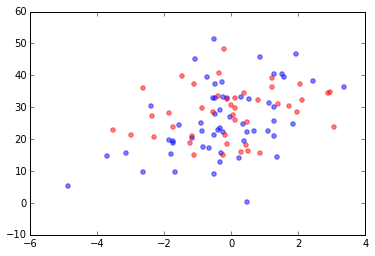

In [194]:
# Volvamos al código anterior
# voy a tratar de etiquetar, a ojo, un punto rojo y otro azul que tengan espacio para un texto
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
# Sigamos con las mujeres
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)

# Los valores que tenemos en las líneas o ticks de los ejes son los valores de los puntos.
# Podemos incluir más, incluir menos, o sencillamente poner lo que queramos


([<matplotlib.axis.YTick at 0x112e44910>,
 <a list of 15 Text yticklabel objects>)

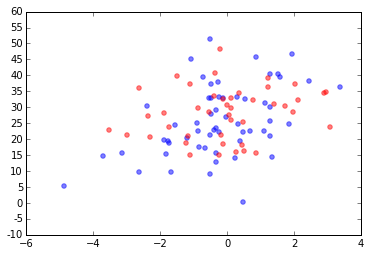

In [201]:
#----------------
# Primer ejemplo: incluyamos en el vertical, ticks que aumenten cada cinco unidades
#----------------
# voy a tratar de etiquetar, a ojo, un punto rojo y otro azul que tengan espacio para un texto
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
# Sigamos con las mujeres
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)

# llamemos al objeto yticks:
# Los argumentos son simples:
# ---> El primero es dónde queremos poner los ticks: le estoy diciendo que empiece en -10, termine en 60 y vaya de 
# ---> cinco en cinco
# El segundo es qué queremos poner: en este caso simplemente quiero números, pero podría ser texto o lo que queramos
# Como en el siguiente ejemplo

plt.yticks(np.arange(-10,61,5),np.arange(-10,61,5), fontsize=10)


([<matplotlib.axis.XTick at 0x1132b3e90>,
 <a list of 6 Text xticklabel objects>)

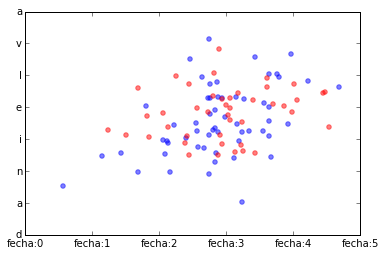

In [203]:
#----------------
# Segundo ejemplo: pongamos nombres arbitrarios
#----------------
# voy a tratar de etiquetar, a ojo, un punto rojo y otro azul que tengan espacio para un texto
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
# Sigamos con las mujeres
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)

# llamemos al objeto yticks:
plt.yticks(np.arange(-10,61,10),['d','a','n','i','e','l','v','a','u','g'], fontsize=10)
# pongamos algunas fechas en el eje x
plt.xticks(np.arange(-6,5,2),['fecha:' + str(i) for i in range(6)], fontsize=10)

([<matplotlib.axis.XTick at 0x11322d290>,
 <a list of 6 Text xticklabel objects>)

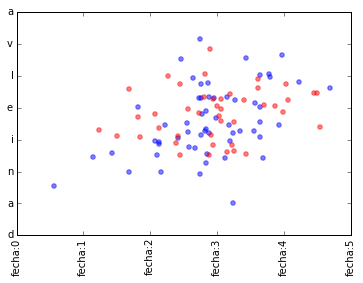

In [205]:
#----------------
# Tercer ejemplo: me gusta, pero por qué no rotamos las etiquetas del eje horizontal
#----------------
# voy a tratar de etiquetar, a ojo, un punto rojo y otro azul que tengan espacio para un texto
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
# Sigamos con las mujeres
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)

# llamemos al objeto yticks:
plt.yticks(np.arange(-10,61,10),['d','a','n','i','e','l','v','a','u','g'], fontsize=10)
# pongamos algunas fechas en el eje x
plt.xticks(np.arange(-6,5,2),['fecha:' + str(i) for i in range(6)], fontsize=10,
              rotation=90)

# Para terminar con este ejemplo vamos a hacer cuatro cosas:

1. Vamos a jugar con subplots: uno para cada género

2. Vamos a cambiar el tipo de [marcadores](http://matplotlib.org/api/markers_api.html) que tiene cada scatterplot

3. Vamos a cambiar las dimensiones de la figura

4. Vamos a cambiar el tamaño de los marcadores para que representen otra variable o dimensión

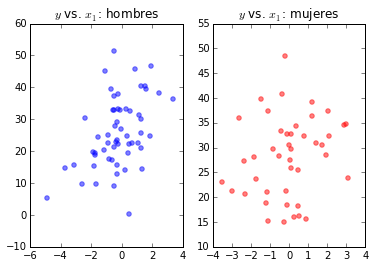

In [249]:
#---------------------------
# Primero: incluir subplots
# plt.subplot() divide una figura en FxC plots independients
#---------------------------
# sintaxis: plt.subplot(num_filas, num_columnas, contador_actual)
# Ejemplo:
# plt.subplot(1,2,1)-----> divide la figura en una fila y dos columnas, y selecciona el primer subplot
# NOTA: para los subplots no hay contador_actual cero.  Empieza en 1 y acaba en N=FxC
# Hagamos esto ahora
# Primer plot, hombres
plt.subplot(1,2,1)
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
plt.title('$y$ vs. $x_1$: hombres')
# Sigamos con las mujeres
plt.subplot(1,2,2)
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)
plt.title('$y$ vs. $x_1$: mujeres')

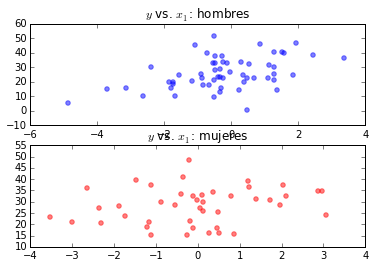

In [250]:
#---------------------------
# Primero: incluir subplots
# 
# Prefieren un arreglo en columnas?
#---------------------------
# Primer plot, hombres
plt.subplot(2,1,1)   #<----- Acá está el cambio
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
plt.title('$y$ vs. $x_1$: hombres')
# Sigamos con las mujeres
plt.subplot(2,1,2)   #<----- Acá está el cambio
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)
plt.title('$y$ vs. $x_1$: mujeres')

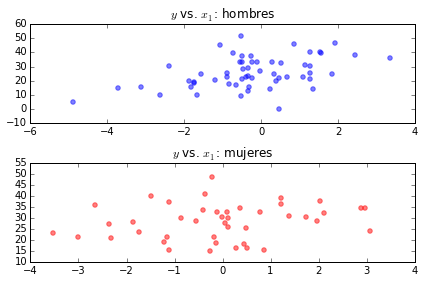

In [251]:
#---------------------------
# Primero: incluir subplots
# Los ejes y los títulos se cruzan
# Usemos la función: plt.tight_layout() para que automáticamente ajusta las distancias
#---------------------------
# Primer plot, hombres
plt.subplot(2,1,1)   #<----- Acá está el cambio
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
plt.title('$y$ vs. $x_1$: hombres')
# Sigamos con las mujeres
plt.subplot(2,1,2)   #<----- Acá está el cambio
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)
plt.title('$y$ vs. $x_1$: mujeres')

# tight_layout
plt.tight_layout()

# Subplot y Gridspec

* Subplot es muy útil, pero es un poco rígido en cuanto a la posición de los distintos plots y sus dimensiones

* Una alternativa es usar [Gridspec](http://matplotlib.org/users/gridspec.html).





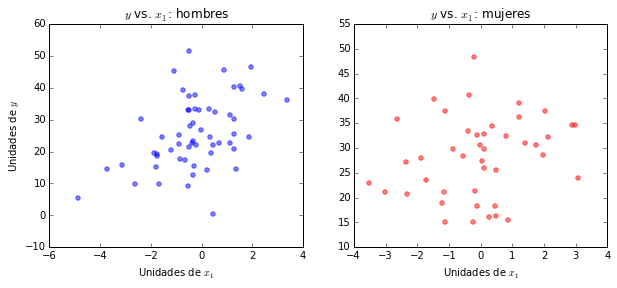

In [252]:
# Cambiemos la dimensión de la figura:
# Para esto:
# 1. Inicializamos un objeto de figura
# 2. Pasamos como argumento el tamaño de la figura: (width,height) en pulgadas
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
plt.title('$y$ vs. $x_1$: hombres')
plt.ylabel('Unidades de $y$')
plt.xlabel('Unidades de $x_1$')
# Sigamos con las mujeres
plt.subplot(1,2,2)
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)
plt.title('$y$ vs. $x_1$: mujeres')
plt.xlabel('Unidades de $x_1$')


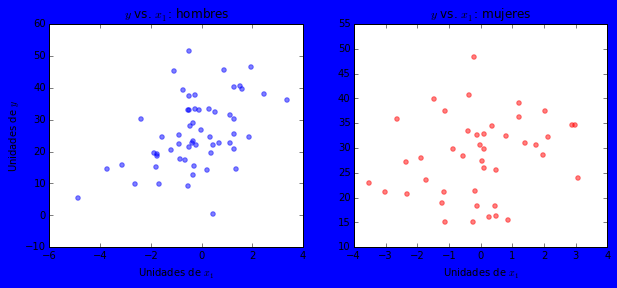

In [253]:
# Miremos otros argumentos
# dpi: dots per inch.  Aumentarlo mejora la calidad de la gráfica pero la hace más pesada.
# facecolor: autoexplicativo
# edgecolor: autoexplicativo
fig = plt.figure(figsize=(10,4),dpi=10,facecolor='b',edgecolor='r')
plt.subplot(1,2,1)
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5)
plt.title('$y$ vs. $x_1$: hombres')
plt.ylabel('Unidades de $y$')
plt.xlabel('Unidades de $x_1$')
# Sigamos con las mujeres
plt.subplot(1,2,2)
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5)
plt.title('$y$ vs. $x_1$: mujeres')
plt.xlabel('Unidades de $x_1$')
# para que quede guardada es importante incluir la siguiente instrucción
# savefig anula lo que habíamos hecho
plt.savefig('edgecolor.png',facecolor=fig.get_facecolor())


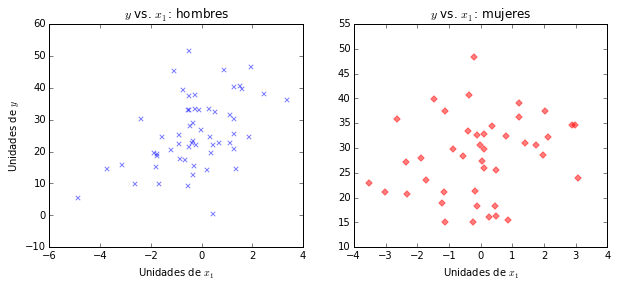

In [258]:
# Cambiemos el tipo de marcador:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x1[hombre_ind==True],y[hombre_ind==True], color='blue',alpha=0.5,marker='x')
plt.title('$y$ vs. $x_1$: hombres')
plt.ylabel('Unidades de $y$')
plt.xlabel('Unidades de $x_1$')
# Sigamos con las mujeres
plt.subplot(1,2,2)
plt.scatter(x1[hombre_ind==False],y[hombre_ind==False], color='red',alpha=0.5,
                   marker='D')
plt.title('$y$ vs. $x_1$: mujeres')
plt.xlabel('Unidades de $x_1$')


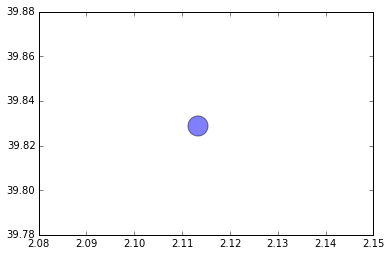

In [266]:
# Finalmente, supongamos que queremos incluir una tercera dimensión y la queremos visualizar
# con el diámetro de cada marcador
# Miremos un primer ejemplo con un sólo punto
plt.scatter(x1[0],y[1],s=400,alpha=0.5)

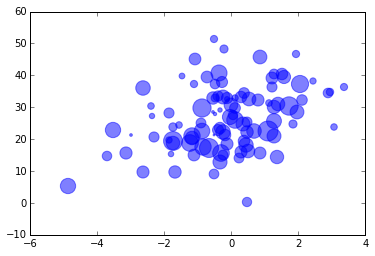

In [271]:
#usemos el vector zvec[:,0] para asignar tamaño
# Queremos que el más grande sea 400 (como en la figura anterior)
# Así que la asignación es una regla de tres:
# z.max = 400
# z_otr = x    -----> x=(z_otr*400)/z.max
# Tenemos que tener cuidado: si lo hacemos así nos va a dar un Warning porque en alguna parte
# Calcula una raíz cuadrada, y algunos de los valores en z0 son negativos
# Por eso estoy usando el valor absoluto abajo

# y tenemos que hacer un loop!
fig = plt.figure()
for i in range(y.shape[0]):
    # listos para graficar cada punto
    mrk_size = (np.abs(zvec[i,0])*400)/np.abs(zvec[:,0]).max()
    plt.scatter(x1[i],y[i],s=mrk_size,color='b', alpha=0.5)

# Gráficos de barras

* En los ejemplos anteriores vimos cómo hacer y customizar los distintos parámetros de un *scatterplot*.

* También hicimos una primera gráfica de *línea* utilizando la función `plt.plot()`

* Las gráficas de barras son muy útiles para presentar resultados de una estimación estadística o econométrica, así que miremos unos ejemplos.

* Es útil que consultemos la ayuda de la función `plt.bar()`

* Aunque vamos a utilizar el argumento `yerr` de `plt.bar()` para graficar los intervalos confidenciales, la función [errorbar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.errorbar) es otra alternativa.

![caption](figures/bar_help.png)



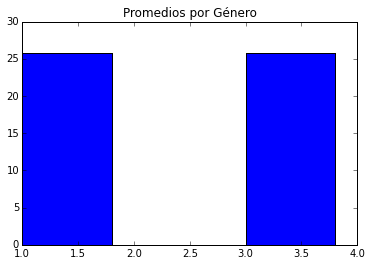

In [280]:
# Veamos cómo cambia y con el género:
# Primero, saquemos una media de cada uno con la función np.mean()
ybar_hombre = y[hombre_ind==True].mean()
ybar_mujer  = y[hombre_ind==True].mean()
# listos
# La sintaxis para casi todos los gráficos es igual:
# Primero: dónde lo vamos a poner
# Después cómo lo vamos poner
plt.bar([1,3],[ybar_hombre,ybar_mujer], color='b')
plt.title(u'Promedios por Género')

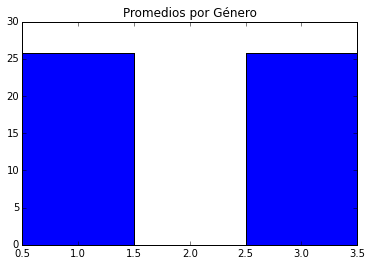

In [283]:
# Las etiquetas numéricas del eje x no significan nada, así que cambiemos eso
# Pero antes, noten que las barras tienen la esquina inferior izquierda en el valor que pusimos.
# Centrémoslas y cambiemos el ancho:
plt.bar([1,3],[ybar_hombre,ybar_mujer], align= 'center',
                                        width = 1, color='b')
plt.title(u'Promedios por Género')

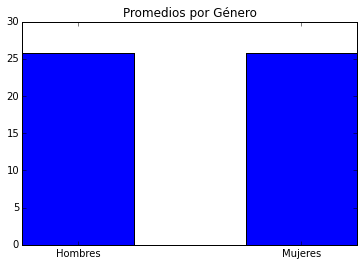

In [285]:
# Ya sabemos cómo cambiar las etiquetas de los ejes:
plt.bar([1,3],[ybar_hombre,ybar_mujer], align= 'center',
                                        width = 1, color='b')
plt.xticks([1,3],['Hombres','Mujeres'])
plt.title(u'Promedios por Género')

[0, 4, 0, 30]

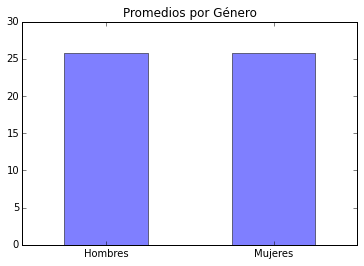

In [292]:
# no es exactamente lo que queíamos
# Cambiemos el método axis
# Primero: "a ojo", después lo vamos a automizar
plt.bar([1,3],[ybar_hombre,ybar_mujer], align= 'center',
                                        width = 1, color='b', alpha=0.5)
plt.xticks([1,3],['Hombres','Mujeres'])
plt.title(u'Promedios por Género')

plt.axis([0,4,0,30])

[0.0, 4.0, 0, 30]

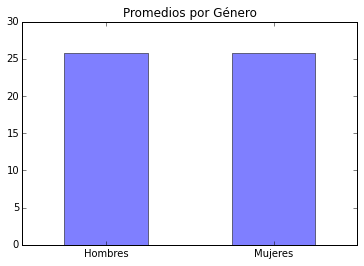

In [295]:
# Cambiemos el método axis
# Ahora automaticémoslo con las función xlim
plt.bar([1,3],[ybar_hombre,ybar_mujer], align= 'center',
                                        width = 1, color='b', alpha=0.5)


plt.xticks([1,3],['Hombres','Mujeres'])
plt.title(u'Promedios por Género')

xmin,xmax = plt.xlim()
#print xmin,xmax
plt.axis([xmin-0.5,xmax+0.5,0,30])

<Container object of 1 artists>

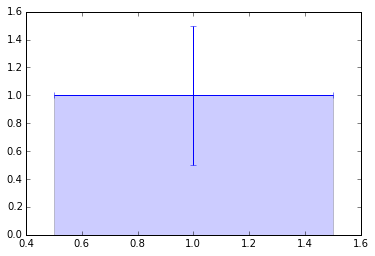

In [302]:
# Finalmente, incluyamos barras de error
# Antes de hacerlo bien, entendamos qué hace el argumento yerr de plt.bar()
plt.bar([1],[1], align= 'center', width = 1, color='b', alpha=0.2,
                                        yerr = 0.5,xerr=0.5)

# Los errores generan intervalos confidenciales con la distancia que pedimos en cada lado
# ----->  length(intervalo) = 2*yerr (xerr funciona igual)

[0.0, 4.0, 0, 30]

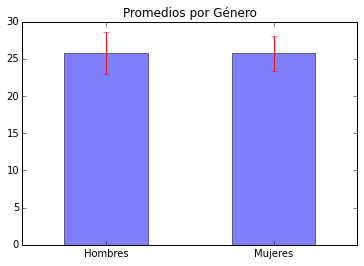

In [309]:
# Queremos obtener el error estándar de la media:
# Recordemos que los intervalos confidenciales de una distribución normal al 95% de significancia están
# a x +/- 1.96*sigma
# Primero: error estándar de la media
stderr_hombre = y[hombre_ind==True].std()/np.sqrt((hombre_ind==True).sum())
stderr_mujer  = y[hombre_ind==False].std()/np.sqrt((hombre_ind==False).sum())

plt.bar([1,3],[ybar_hombre,ybar_mujer], yerr = 1.96*np.array([stderr_hombre,stderr_mujer]),
                                        ecolor='r',
                                        align= 'center',
                                        width = 1, color='b', alpha=0.5)


plt.xticks([1,3],['Hombres','Mujeres'])
plt.title(u'Promedios por Género')

xmin,xmax = plt.xlim()
#print xmin,xmax
plt.axis([xmin-0.5,xmax+0.5,0,30])

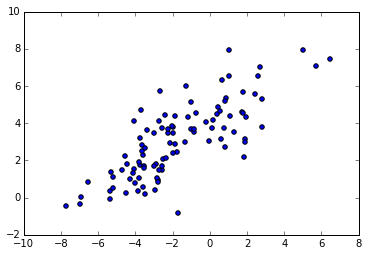

In [312]:
# Finalmente, veamos cómo se puede dividir en cuadrantes un scatter plot.
# Al mismo tiempo practicaremos el uso de booleanos
# y aprenderemos a graficar líneas constantes
# Este era el plot original
plt.scatter(zvec[:,0],zvec[:,1])

[-10, 8, -2, 10]

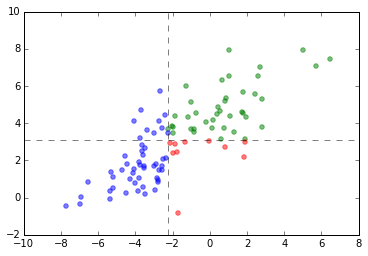

In [317]:
# ahora utilizemos las medianas para dividir en cuadrantes:
med_x = np.median(zvec[:,0])
med_y = np.median(zvec[:,1])
# listo:
# Encontremos variables indicadoras de cada cuadrante: booleanos
ind_q1 = np.logical_and(zvec[:,0]>=med_x,
                        zvec[:,1]>=med_y)

ind_q2 = np.logical_and(zvec[:,0]<med_x,
                        zvec[:,1]>=med_y)

ind_q3 = np.logical_and(zvec[:,0]<med_x,
                        zvec[:,1]<med_y)

ind_q4 = np.logical_and(zvec[:,0]>=med_x,
                        zvec[:,1]<med_y)
# ahora grafiquemos un scatterplot para cada cuadrante con colores diferentes:
plt.scatter(zvec[ind_q1,0],zvec[ind_q1,1], color='g', alpha=0.5)
plt.scatter(zvec[ind_q2,0],zvec[ind_q2,1], color='b', alpha=0.5)
plt.scatter(zvec[ind_q3,0],zvec[ind_q3,1], color='b', alpha=0.5)
plt.scatter(zvec[ind_q4,0],zvec[ind_q4,1], color='r', alpha=0.5)
# finalmente líneas vertical y horizontal para demarcar los cuadrantes:
plt.plot([-10,8],[med_y,med_y], color='k', alpha=0.5,ls='--')
plt.plot([med_x,med_x],[-2,10], color='k', alpha=0.5,ls='--')
plt.axis([-10,8,-2,10])